The aim of this project is to visualise GPS data collected from real football matches. After being provided the data in an Excel spreasheet, we can insert this data into a data base for ease of use. The code for the database creating can be found in SQLalchlog.

Once the database is create, we can now start by asking what visualisations we want to do. Figure that allow for pairwise comparison between teams and positions would be good. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

Now, we may want to see how a measure differs between positions. Take HSR (high speed running per minute): this would probably differ greatly between positions. In the file "figure_generators.py" are functions for generating these figures

In [28]:
from figure_generators import generate_RPs_position_row, generate_RPs_team_row, generate_RPs_team_position_row

In [14]:
# code for getting measure dataframe

def get_measure_df(measure):

    measures = sessions_data_table.columns
    measure_column = measures[measure]

    with engine.connect() as conn:
        stmt = (
            select(players_table.c.team, players_table.c.position, measure_column)
            .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
            .order_by(players_table.c.team)
        )

        data = conn.execute(stmt).mappings().all()

    return pd.DataFrame(data)

Here we can see how each position's HSR/min distrobution estimation!

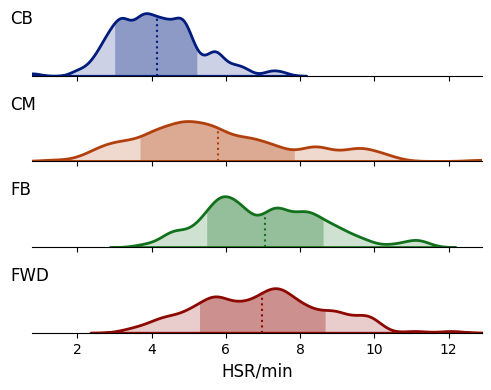

In [22]:
# visualizng the measurement
df = get_measure_df("HSR/min")
generate_RPs_position_row(df=df, measure="HSR/min", pallette="dark", show_stdv=True, bw_adjust=0.5, height=1)

We can also look at measures by team. In this case, these seems to be far less difference between teams than there are between positions.

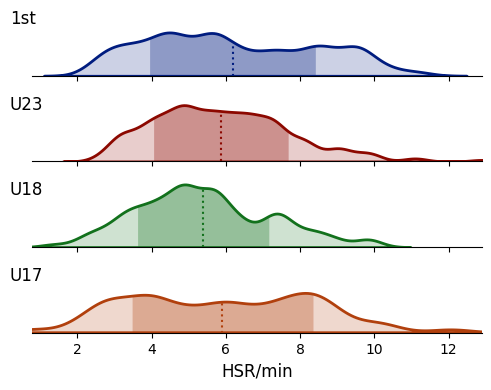

In [21]:
generate_RPs_team_row(df=df, measure="HSR/min", pallette="dark", show_stdv=True, bw_adjust=0.5, height=1)

But what if wanted to compare between teams and positions in pariswise comparisons? In that case

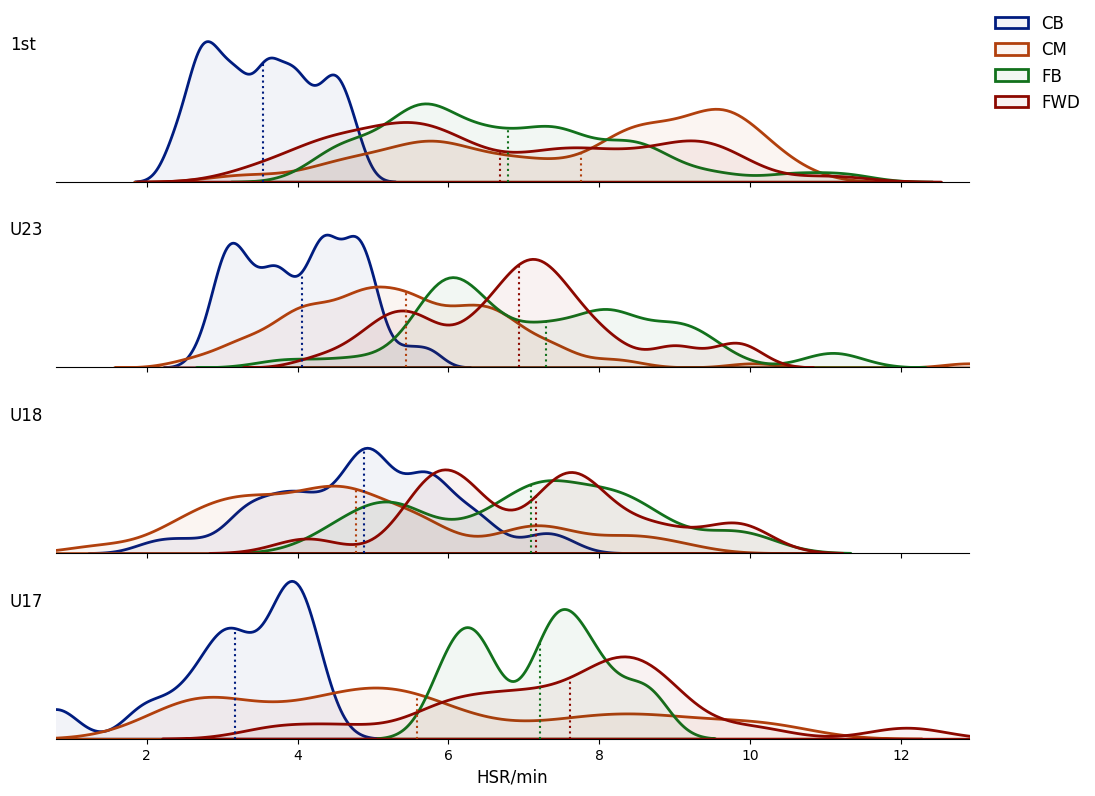

In [31]:
generate_RPs_team_position_row(df=df, measure="HSR/min", pallette="dark", bw_adjust=0.5, height=2)